# SALES DATA ANALYSIS

# Imported Library

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales = pd.read_csv("sales_data.csv")   # your dataset
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales.head()


,order_date,product,region,quantity,unit_price
0,2024-01-05,Notebook,North,2,120
1,2024-01-08,Keyboard,South,1,450
2,2024-01-12,Mouse,East,3,300
3,2024-01-15,Laptop,West,1,55000
4,2024-01-18,Headset,North,2,1500


In [7]:
sales['revenue'] = sales['quantity'] * sales['unit_price']


# CHECKING MONTHLY SALES DATA

In [10]:
print(monthly_sales.columns)
print(monthly_sales.head())


Index(['month', 'revenue'], dtype='object')
     month  revenue
0  2024-01   119070
1  2024-02   118860
2  2024-03   121900


# B)Convert to Numeric (for 'revenue')

In [19]:
import pandas as pd

monthly_sales['revenue'] = pd.to_numeric(monthly_sales['revenue'], errors='coerce')
# Optional: fill NaNs if you prefer, e.g., monthly_sales['revenue'] = monthly_sales['revenue'].fillna(0)


# C)Convert to Datetime or String (for 'month')

In [20]:
monthly_sales['month'] = monthly_sales['month'].astype(str)


# STEP:3. Monthly Sales Trend

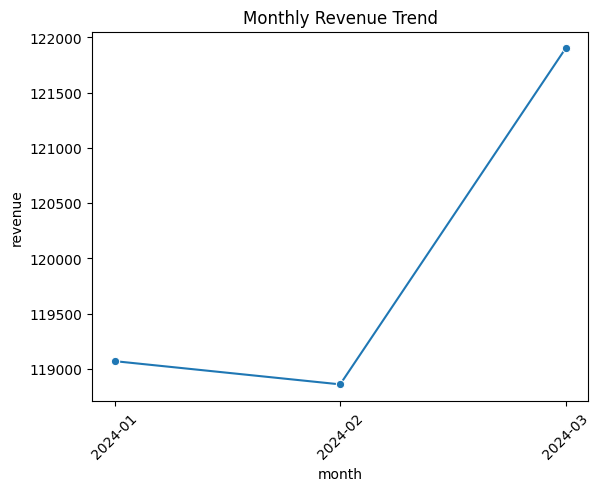

In [21]:
sns.lineplot(data=monthly_sales, x='month', y='revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()


# STEP:4. Top-Selling Products

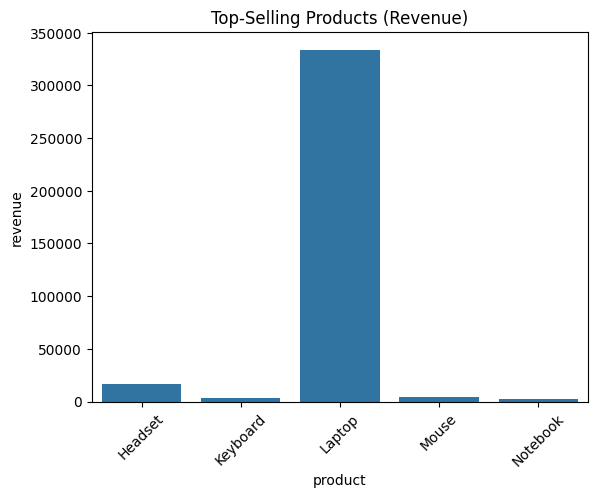

In [22]:
product_sales = sales.groupby('product')['revenue'].sum().reset_index()

sns.barplot(data=product_sales, x='product', y='revenue')
plt.title("Top-Selling Products (Revenue)")
plt.xticks(rotation=45)
plt.show()


# STEP:5. Sales by Region

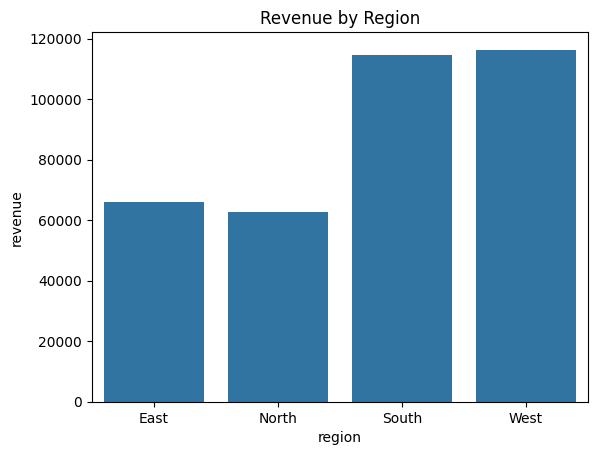

In [23]:
region_sales = sales.groupby('region')['revenue'].sum().reset_index()

sns.barplot(data=region_sales, x='region', y='revenue')
plt.title("Revenue by Region")
plt.show()


# STEP:6. Quantity Sold vs Revenue

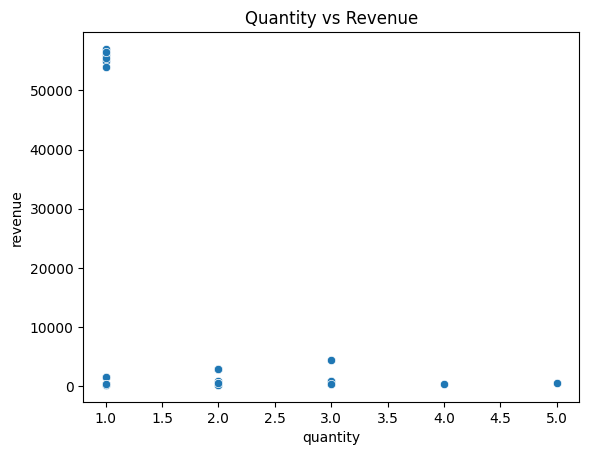

In [24]:
sns.scatterplot(data=sales, x='quantity', y='revenue')
plt.title("Quantity vs Revenue")
plt.show()


# STEP:7  Product Performance Heatmap

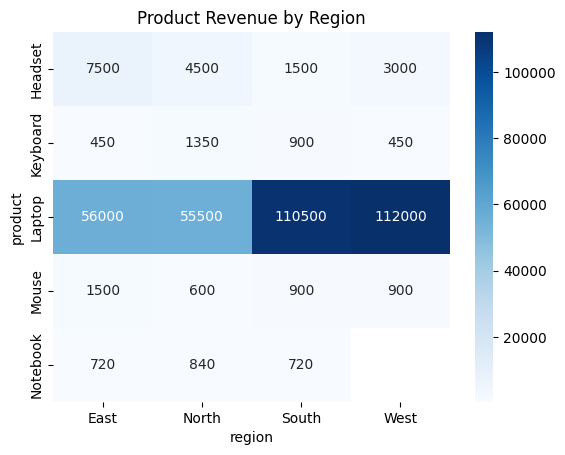

In [25]:
heat = sales.pivot_table(values='revenue', index='product', columns='region', aggfunc='sum')

sns.heatmap(heat, annot=True, fmt=".0f", cmap="Blues")
plt.title("Product Revenue by Region")
plt.show()
